<a href="https://colab.research.google.com/github/climp-hub/LGMVIP-Data-Science/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGMVIP TASK: Prediction Using Decision Tree Algorithm

In [46]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing warning and filtering it to ignore
import warnings
warnings.filterwarnings('ignore')

In [47]:
#Loading Dataset
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#Droping Id column
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [49]:
df.shape #Printing shape of Dataset

(150, 5)

In [50]:
df.columns #Printing Column Names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [51]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
#Checking Inforamation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
df.describe() #Describing Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
df.corr() #Correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [55]:
#Grouping by Species and then printing the size 
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Data Visulaisation

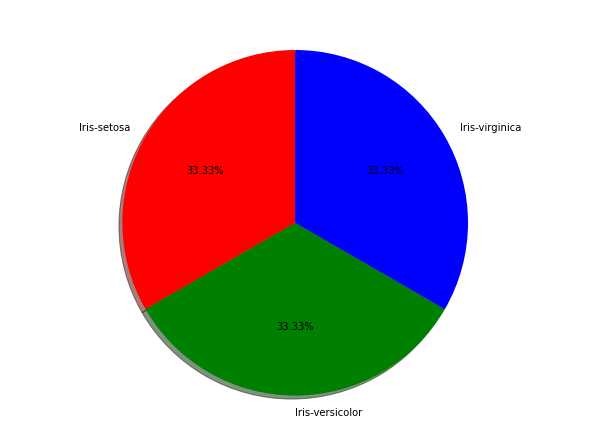

In [56]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ["red", "green", "blue"]
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct="%1.2f%%", colors=colors, shadow=True, startangle=90)
plt.show()

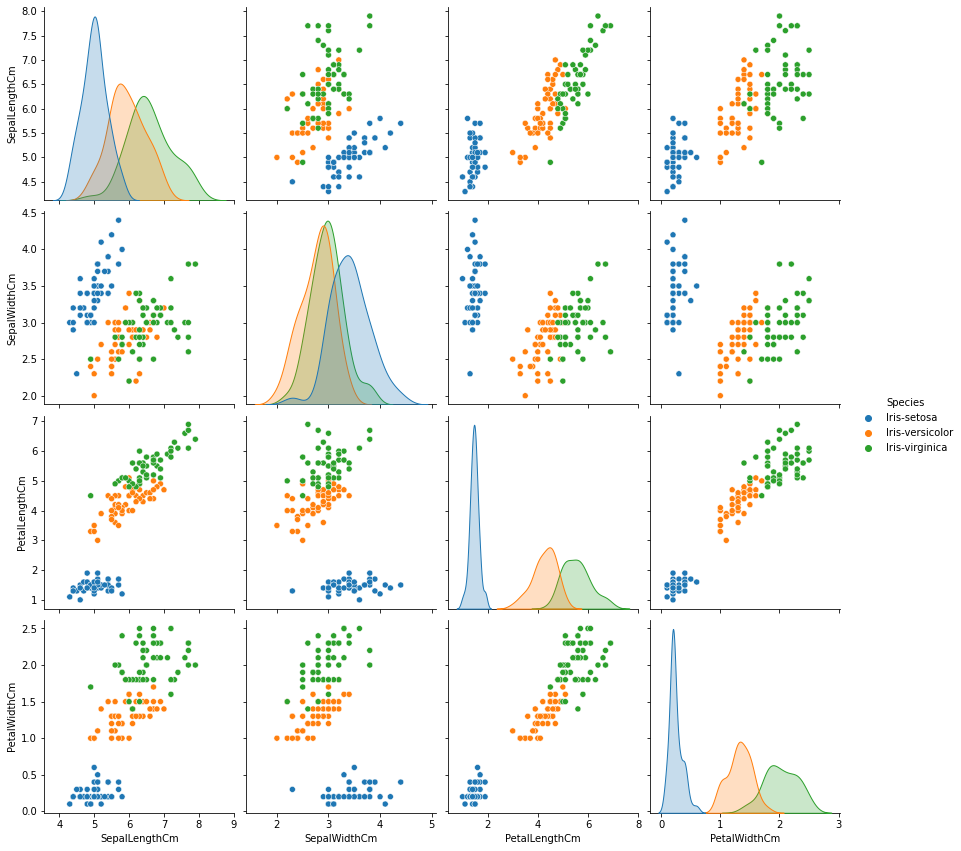

In [57]:
#Pairplot
sns.pairplot(df, hue="Species", height = 3)
plt.show()

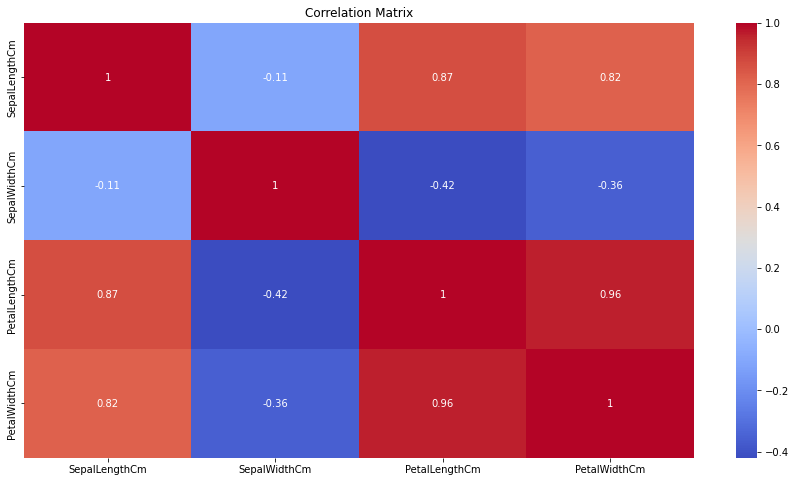

In [58]:
plt.figure(figsize=(15,8))
corr_mat = df.corr() #correlation matrix
cm = sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
cm.set_title("Correlation Matrix")
plt.show()

Spliting data into training and test set


In [59]:
X = df.drop(['Species'], 1)
y = df['Species']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
X_train.head() #printing top 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [62]:
y_train.head() #printing top 5 rows

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

Training Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=20)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

Evaluating Decision Tree

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) #accuracy score
print("Accuracy: ", accuracy)

Accuracy:  0.9777777777777777


In [65]:
#confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [66]:
#Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [67]:
features = df.columns[:-1] #Selecting Species as features
classes = df.Species.unique().tolist()

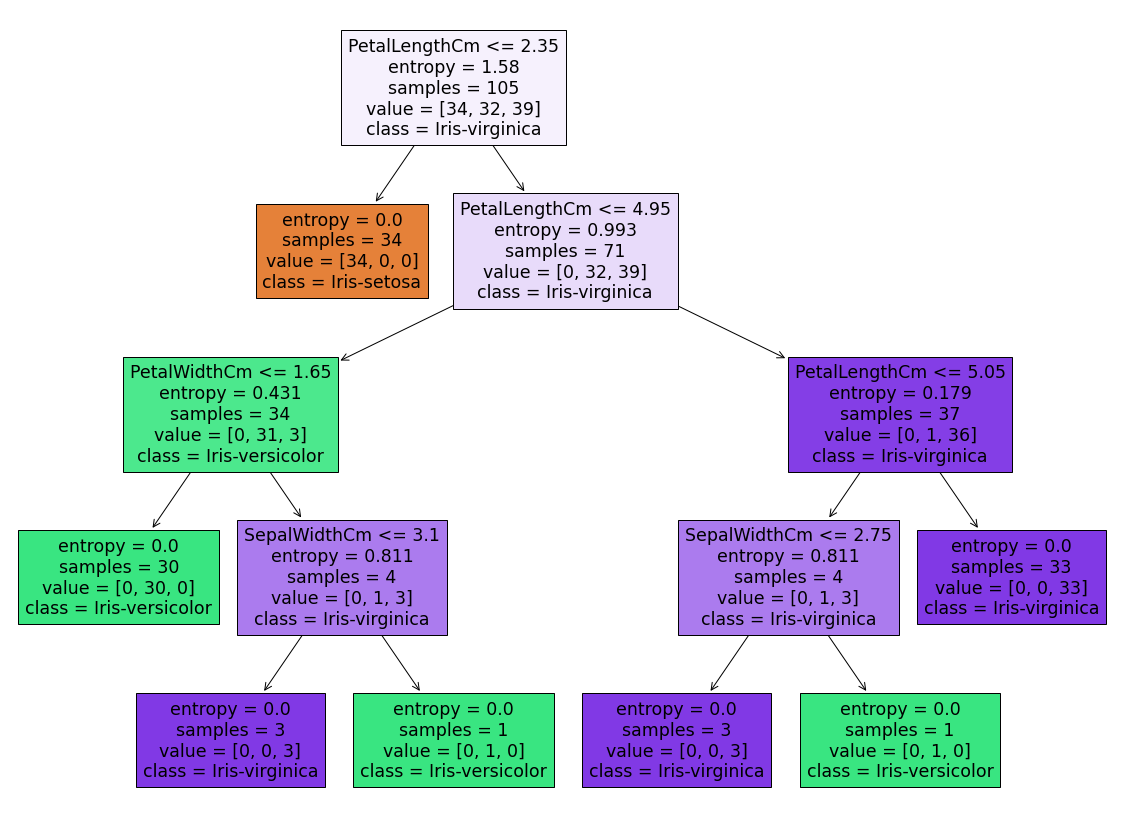

In [68]:
from numpy.lib.twodim_base import triu_indices
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier, feature_names=features, class_names=classes, filled=True)
plt.show()

Test prediction on Sample Data

In [69]:
test_pred = classifier.predict([[3.4, 5.3, 2.3, 1.3]])
print(test_pred[0])

Iris-setosa


The classifier predicted Iris-setosa as Species

In [70]:
test_pred2 = classifier.predict([[7.6, 4.4, 4.3, 2.6]])
print(test_pred2[0])

Iris-versicolor


The classifier predicted Iris-versicolor as Species

In [71]:
test_pred3 = classifier.predict([[7.1, 7.4, 8.3, 4.6]])
print(test_pred3[0])

Iris-virginica


The classifier predicted Iris-virginica as Species